In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from collections import OrderedDict
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
from matplotlib import gridspec
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

def convert_nan_to_val(data, value=0):
    data[pd.isnull(data)] = value
    return data

In [2]:
not_combined_pickle_file = './paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file = './paper_models_csvs_pkls/combined_data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### 
not_combined_ds = pickle.load(open(not_combined_pickle_file, 'rb'))
combined_ds = pickle.load(open(combined_pickle_file, 'rb'))

not_combined_pickle_file_stat_sig = './paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file_stat_sig = './paper_models_csvs_pkls/combined_data_models-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### 
not_combined_ds_stat_sig = pickle.load(open(not_combined_pickle_file_stat_sig, 'rb'))
combined_ds_stat_sig = pickle.load(open(combined_pickle_file_stat_sig, 'rb'))

not_combined_pickle_file_no_stat_sig = './paper_models_csvs_pkls/data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file_no_stat_sig = './paper_models_csvs_pkls/combined_data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### 
not_combined_ds_no_stat_sig = pickle.load(open(not_combined_pickle_file_no_stat_sig, 'rb'))
combined_ds_no_stat_sig = pickle.load(open(combined_pickle_file_no_stat_sig, 'rb'))

In [3]:
### fix some of the datasets so that the mz and rt columns are correct
def set_mz_rt_name(ds_to_study):
    for k, v in ds_to_study.items(): 
        for ds in v:
            replace = {'mass_to_charge':'mz', 'mzmed':'mz', 'Mass':'mz', 'm/z':'mz', 'Mass-to-Charge':'mz',
                       'moverz_quant':'mz','quant mz':'mz', 'quantified m/z':'mz', 'row m/z':'mz', 'Quant mx':'mz', 
                       'Quantified m/z':'mz',
                       'retention_time':'rt', 'rtmed':'rt', 'Retention Time':'rt', 'RT':'rt','row retention time':'rt',
                        'retention index':'rt', 'ri':'rt', 'retention time':'rt' }
            ds['peaks'] = ds['peaks'].rename(columns=replace)
studies = [not_combined_ds_stat_sig, not_combined_ds_no_stat_sig, not_combined_ds]
for s_ in studies:
    set_mz_rt_name(s_)

In [4]:
def df_naming_cleanup(df):
    fixes = {'autoimmune': 'rheumatologic', 'glomerular':'renal', 'metabolic':'endocrine',
             'neurological':'Neuro/Neuropsychiatric', 
             'minimal change disease, focal segmental sclerosis':'minimal change disease, focal segmental sclerosis, healthy',
             'Alzheimers':"Alzheimer's", 
             'Stability of dried blood samples - diabetic men':'diabetic men (long sample storage)',
             'lung cancer - non-small-cell lung cancer (adenocarcinoma, etc)': 'lung cancer', 
             'lung cancer - adenocarcinoma':'lung cancer',
             'scleroderma PAH': 'Pulmonary Artery Hypertension in Scleroderma',
             'Obesity - Non-diabetic and T2 diabetic': 't2 diabetes'
             }
    df = df.replace(fixes)
    return df

In [5]:
all_data = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv').sort_values('study')
all_data = all_data.replace('ST000389', 'ST000388')
nosig_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
nosig_LR = nosig_LR.replace('ST000389', 'ST000388')
nosig_LR = df_naming_cleanup(nosig_LR)
all_data = df_naming_cleanup(all_data)
all_data = all_data.sort_values(by=['analysis'])
nosig_LR = nosig_LR.sort_values(by=['analysis'])
nosig_LR

,Unnamed: 0,analysis,auc,auc_std,avg_stat_sig_per_model,case,control,disease,disease_type,features,label,model_nonzero_coef,number_labels,samples,significant,study,test_size,train_size,Instrument_category,Instument,column,mode,type,time_unit,delta_time
98,98,AN000452_CRC_Polyp,0.617679,0.037593,0.0,76,64,Colorectal Cancer,cancer,82,v2,82,2,140,31,ST000284,27,113,LC,Agilent 1260-AB Sciex 5500,HILIC,both,serum,unknown,unknown
96,96,AN000452_Healthy_CRC,0.700938,0.030062,0.0,64,84,Colorectal Cancer,cancer,88,v0,88,2,148,25,ST000284,28,120,LC,Agilent 1260-AB Sciex 5500,HILIC,both,serum,unknown,unknown
97,97,AN000452_Healthy_Polyp,0.535169,0.031088,0.0,76,84,Colorectal Cancer,cancer,113,v1,71,2,160,0,ST000284,31,129,LC,Agilent 1260-AB Sciex 5500,HILIC,both,serum,unknown,unknown
105,105,AN000580,0.735850,0.022121,0.0,135,76,Breast Cancer,cancer,77,x0,67,2,211,51,ST000355,42,169,GC,LECO-Pegasus HT TOF MS,silica,positive,plasma,unknown,unknown
106,106,AN000581,0.695609,0.020381,0.0,135,76,Breast Cancer,cancer,52,x1,52,2,211,47,ST000355,42,169,LC,Agilent 6220 MSD,C18,both,plasma,unknown,unknown
107,107,AN000582,0.575760,0.042126,0.0,103,31,Breast Cancer,cancer,31,y0,2,2,134,70,ST000356,26,108,GC,LECO-Pegasus HT TOF MS,silica,positive,serum,unknown,unknown
108,108,AN000583,0.782627,0.032363,0.0,103,31,Breast Cancer,cancer,61,y1,61,2,134,110,ST000356,26,108,LC,Agilent 6220 MSD,C18,both,serum,unknown,unknown
110,110,AN000618,0.763966,0.070165,0.0,44,12,t2 diabetes,endocrine,91,A0,91,2,56,15,ST000383,10,46,GC,LECO Pegasus IV,silica,positive,plasma,unknown,unknown
118,118,AN000705,0.753571,0.041128,0.0,45,39,Chronic fatigue,other,175,G0,168,2,84,40,ST000450,16,68,LC,Qtrap 5500 Triple quadrupol,HILIC,positive,plasma,unknown,unknown
119,119,AN000706,0.783902,0.033824,0.0,45,39,Chronic fatigue,other,206,G1,32,2,84,0,ST000450,16,68,LC,Qtrap 5500 Triple quadrupol,HILIC,negative,plasma,unknown,unknown


In [6]:
study_names = ['ST000046', 'MTBLS72', 'ST000062','MTBLS92','ST000356', 'ST000355',
                 'ST000918', 'ST000284', 'ST000865', 'MTBLS19_data', 'MTBLS105', 'MTBLS17',
                 'ST000385', 'ST000388', 'ST000392', 'ST000396', 'MTBLS28', 'Feng', 'MTBLS352',
                 'ST000608', 'ST000045', 'ST000383', 'MTBLS253', 'MTBLS279', 'ST000888',
                 'ST000578', 'MTBLS315', 'MTBLS354', 'MTBLS579', 'MTBLS266', 'ST000450',
                 'ST000381', 'MTBLS364', 'ST000329', 'MTBLS358', 'MTBLS408', 'ST000763']
study_ID = ['A1','A2','A3','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','C1',
            'D1','D2','D3','D4','E1','E2','E3','E4','E5','E6','E7','F1','F2','F3','F4','G1','H1','I1','I2']
name_to_id = {s:s_id for s,s_id in zip(study_names, study_ID)}

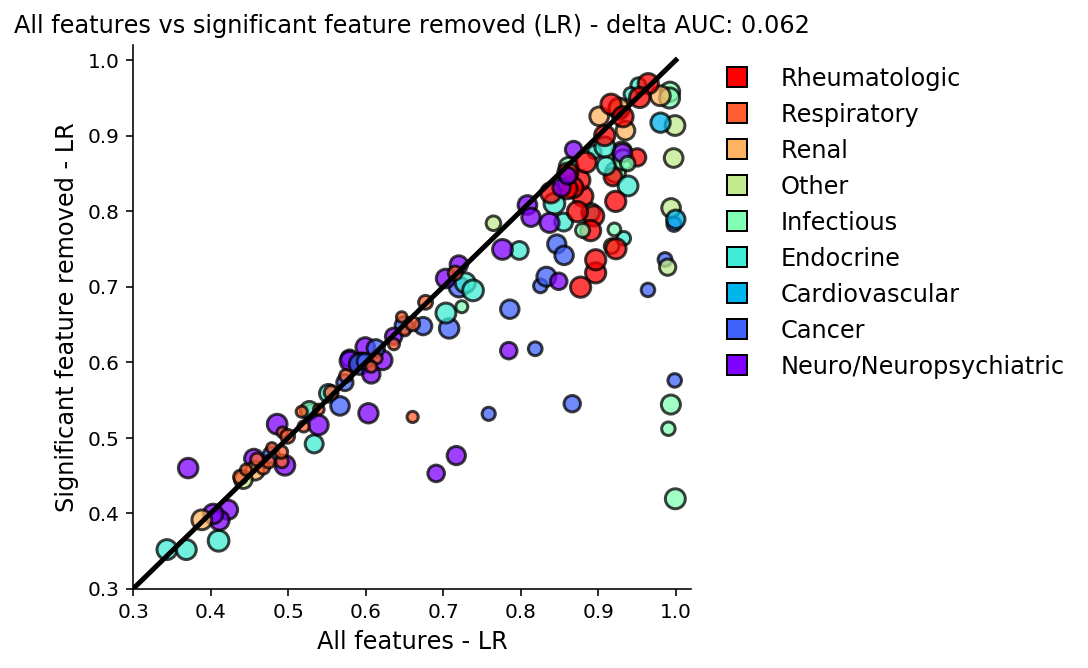

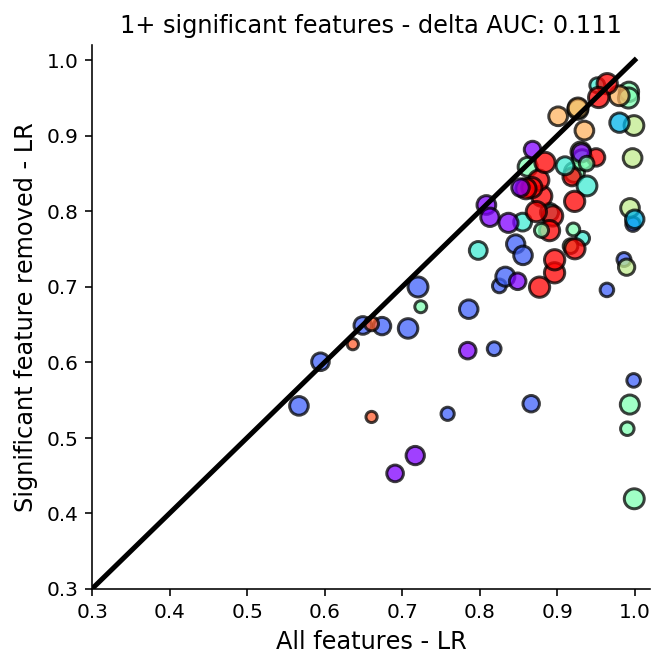

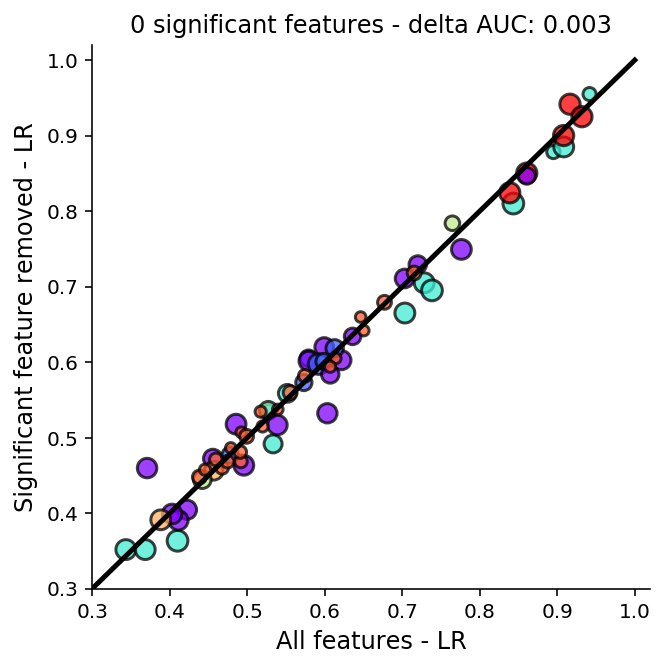

In [7]:
#### compare the combined between model types and +/- stat sig features

##### NOTE: need to add in the rest of the datasets where there was nothing to combine / couldnt for complete analysis 
##### also need to add color based on which disease it is. maybe size of dot by study size
def load_and_combine(individual, combined):
    individual_ds = pd.read_csv(individual)
    combined_ds = pd.read_csv(combined)
    ##### the combined data does not have a disease type....
    combined_ds = combined_ds.drop(columns='disease_type')
    combined_metadata = pd.read_csv('combined_ds_metadata.csv')
    combined_ds = combined_ds.merge(combined_metadata, on='analysis')
    # lr_combined_ds = lr_combined_ds.rename(index=str, columns={"auc": "combined_auc", "auc_std": "combined_auc_std"})
    combined_and_indiv = individual_ds.append(combined_ds)
    combined_and_indiv = combined_and_indiv.sort_values('study')
    return combined_and_indiv
    
### getting colors:
def get_colors(ds, all_data):
    disease_types_unique = all_data.disease_type.unique()
    color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
    disease_types = list(ds.disease_type)
    # print(disease_types_unique)
    disease_to_num = {disease:i for i,disease in enumerate(sorted(disease_types_unique))}
    cmap = matplotlib.cm.get_cmap('rainbow')
    disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}
    colors = [disease_to_color_legend[disease] for disease in disease_types]
    
    disease_to_color_legend = [(disease,cmap(color_fractions[disease_to_num[disease]])) for disease in disease_to_num]
#     legend_data = [['Author data', 'k', 'k', '>'],
#                    ['Reprocessed data', 'k', 'k', 'o']]
    legend_data = []
    for ele in disease_to_color_legend[::-1]:
        legend_data.append([ele[0][0].upper()+ele[0][1:], ele[1], 'k','s'])
    patches_bar = []
    for ele in legend_data:
        patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
    return colors, patches_bar

def plot_comparision(data1, data2, axis, colors, name1, name2, title):
    axis.scatter(data1.auc, data2.auc, s=10*np.log(data1.features), alpha=0.75, linewidth=1.5, c=colors, edgecolor='k', cmap='rainbow')
    axis.set_xlim([0.3,1.02])
    axis.set_ylim([0.3,1.02])
    axis.plot([0.3,1],[0.3,1], 'k', linewidth=2.5)
    axis.set_xlabel(name1, fontname='Dejavu Sans', fontsize=12)
    axis.set_ylabel(name2, fontname='Dejavu Sans', fontsize=12)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_title(title)
    return ax

data_1 = all_data
data_2 = nosig_LR
name_1 = 'All features - LR'
name_2 = 'Significant feature removed - LR'

fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
colors, patches_bar = get_colors(all_data, all_data)
diff = 0
diff = (data_1.auc - data_2.auc).mean(axis=0)
title = 'All features vs significant feature removed (LR) - delta AUC: {}'.format(round(diff,3))
ax = plot_comparision(data_1, data_2, ax, colors, name_1, name_2, title)
## now actually plot this as a legend
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(1, 1), frameon=False, prop=font)
plt.savefig('Figure_5a_SI_combined.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(5,5)) 
ax1 = plt.subplot()
d1 = data_1[data_1.significant != 0]
d2 = data_2[data_1.significant != 0]
color_1, _ = get_colors(d1, all_data)
diff = (d1.auc - d2.auc).mean(axis=0)
title_1 = '1+ significant features - delta AUC: {}'.format(round(diff,3))
ax1 = plot_comparision(d1, d2, ax1, color_1, name_1, name_2, title_1)
plt.savefig('Figure_5a.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(5,5)) 
ax2 = plt.subplot()
d1 = data_1[data_1.significant == 0]
d2 = data_2[data_1.significant == 0]
color_2, _ = get_colors(d1, all_data)
diff = (d1.auc - d2.auc).mean(axis=0)
title_2 = '0 significant features - delta AUC: {}'.format(round(diff,3))
ax2 = plot_comparision(d1, d2, ax2, color_2, name_1, name_2, title_2)
plt.savefig('Figure_5_SI.svg', format='svg', dpi=1000, bbox_inches='tight')  
#     plt.savefig('Fig2_a_b.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

#### FIGURE 5

In [8]:
#### FIGURE 5
## do adducts need to be calculated for each of the stat sig features? if yes, make write_add = True, else False
write_add = False
individual_ds = data_1
print(individual_ds)

#### ok for the datasets where they still do well with no stat sig metabs, what are these? are they adducts of the stat sig onces?
def get_comparable_study_data(data_1, data_2, model_names, query):
    '''
    use this to get the data from two different model trainings for the specified data sets:
    input:
        data_1: the first dictionary of datasets with accompanying data
        data_2: the first dictionary of datasets with accompanying data
        model_names: names for the dicts of the two data dictionaries, order must match
        query: list of list or tuples that have the datasets to compare
    output:
        data_from_query: a dict mapping the model_name of the datasets to a list of the necessary data
    '''
    data_from_query = {name:[] for name in model_names}
    for s_1,s_2 in zip(data_1, data_2):
        for ss_1, ss_2 in zip(data_1[s_1], data_2[s_2]):
            if ss_1['data_set'] not in query:
                continue
            data_from_query[model_names[0]].append(ss_1)
            data_from_query[model_names[1]].append(ss_2)
    return data_from_query
    
skip_ds = ['m_oxylipin_chronic_hep_b', 'm_GC_nmfi_and_bsi_diagnosis_v2_maf',
           'm_CER_mass_spectrometry_v4_3_CS', 'm_CER_mass_spectrometry_v4_0_NS', 
           'm_CER_mass_spectrometry_v4_2_FS', 'm_CER_mass_spectrometry_v4_1_COPD', 'm_EICO_mass_spectrometry_v4_3_CS',
           'm_EICO_mass_spectrometry_v4_3_CS','m_EICO_mass_spectrometry_v4_0_NS', 'm_EICO_mass_spectrometry_v4_2_FS',
           'm_EICO_mass_spectrometry_v4_1_COPD','m_SHOT_mass_spectrometry_v4_3_CS','m_SHOT_mass_spectrometry_v4_0_NS',
           'm_SHOT_mass_spectrometry_v4_2_FS', 'm_SHOT_mass_spectrometry_v4_1_COPD', 'm_TAG_mass_spectrometry_v4_3_CS',
           'm_TAG_mass_spectrometry_v4_0_NS', 'm_TAG_mass_spectrometry_v4_2_FS', 'm_TAG_mass_spectrometry_v4_1_COPD', 
           'm_typhoid_carriage_metabolite_profiling_mass_spectrometry_v2_maf', 'AN000452_0_Healthy',
           'AN000452_1_CRC', 'AN000452_2_Polyp', 'AN000525_1_MCD', 'AN000525_2_FSGS', 'AN000525_0_Control', 'AN000526_0_Control', 'AN000526_2_FSGS', 'AN000526_1_MCD', 
           'AN000580', 'AN000581', 'AN000582', 'AN000583', 'AN000705', 'AN000706', 'AN000931', 'AN000076_0_CN', 
           'AN000077_0_CN', 'AN000078_0_CN', 'AN000079_0_CN', 'AN000076_2_MCI', 'AN000077_2_MCI', 'AN000078_2_MCI', 'AN000079_2_MCI',
           'AN000076_1_AD', 'AN000077_1_AD', 'AN000078_1_AD', 'AN000079_1_AD',
            ###### from the one-v-one datasets
           'm_CER_mass_spectrometry_v4_COPD_FS', 'm_CER_mass_spectrometry_v4_COPD_CS', 'm_CER_mass_spectrometry_v4_COPD_NS', 'm_CER_mass_spectrometry_v4_FS_CS', 
           'm_CER_mass_spectrometry_v4_FS_NS', 'm_CER_mass_spectrometry_v4_CS_NS', 'm_EICO_mass_spectrometry_v4_COPD_FS', 'm_EICO_mass_spectrometry_v4_COPD_CS',
           'm_EICO_mass_spectrometry_v4_COPD_NS', 'm_EICO_mass_spectrometry_v4_FS_CS', 'm_EICO_mass_spectrometry_v4_FS_NS', 'm_EICO_mass_spectrometry_v4_CS_NS',
           'm_SHOT_mass_spectrometry_v4_COPD_FS', 'm_SHOT_mass_spectrometry_v4_COPD_CS', 'm_SHOT_mass_spectrometry_v4_COPD_NS', 'm_SHOT_mass_spectrometry_v4_FS_CS',
           'm_SHOT_mass_spectrometry_v4_FS_NS', 'm_SHOT_mass_spectrometry_v4_CS_NS', 'm_TAG_mass_spectrometry_v4_COPD_FS', 'm_TAG_mass_spectrometry_v4_COPD_CS',
           'm_TAG_mass_spectrometry_v4_COPD_NS', 'm_TAG_mass_spectrometry_v4_FS_CS', 'm_TAG_mass_spectrometry_v4_FS_NS', 'm_TAG_mass_spectrometry_v4_CS_NS',
           'AN000076_CN_MCI', 'AN000076_CN_AD', 'AN000076_MCI_AD', 'AN000077_CN_MCI', 'AN000077_CN_AD', 'AN000077_MCI_AD', 'AN000078_CN_MCI', 'AN000078_CN_AD', 
           'AN000078_MCI_AD', 'AN000079_CN_MCI', 'AN000079_CN_AD', 'AN000079_MCI_AD', 'AN000452_Healthy_CRC', 'AN000452_Healthy_Polyp', 'AN000452_CRC_Polyp',
           'AN000525_MCD_FSGS', 'AN000525_MCD_Control', 'AN000525_FSGS_Control', 'AN000526_MCD_FSGS', 'AN000526_MCD_Control', 'AN000526_FSGS_Control']
low_res = ['IPO_aligned_MTBLS105_qMS', 'IPO_aligned_MTBLS105_SIM-MS', 'IPO_aligned_MTBLS315_mzData', 'AN000100', 'AN000101',
           'XCMS-Report-annotated-SingleClass-GCTOF.', 'XCMS-Report-annotated-SingleClass-GCTOF.plasma', 'AN000615', 'IPO_aligned_ST000381_pos', 'AN000618',
           'AN000603_plasma', 'AN000603_serum', 'AN000620_plasma', 'AN000620_serum', 'IPO_aligned_ST000385_adc2_plasma',
           'IPO_aligned_ST000385_adc2_serum', 'IPO_aligned_ST000385_adc1_plasma', 'IPO_aligned_ST000385_adc1_serum',
           'AN000625_GC', 'IPO_aligned_ST000388_GC', 'AN000628_plasma', 'AN000628_serum', 'IPO_aligned_ST000392_plasma',
           'IPO_aligned_ST000392_serum', 'AN000633', 'IPO_aligned_ST000396', 'AN001390all_author', 
           'IPO_aligned_ST000865_batch2_raw', 'IPO_aligned_ST000865_batch3_raw', 'IPO_aligned_ST000865_onebatch','m_chronic_hep_b_POS','m_chronic_hep_b_NEG',
           'IPO_aligned_ST000385_onebatch_plasma','IPO_aligned_ST000385_onebatch_serum']
bad_ds = skip_ds + low_res

current_interest_studies = list(all_data.analysis)
current_interest_studies = [s for s in current_interest_studies if s not in bad_ds]
# current_interest_studies = current_interest_studies[6:9]
# current_interest_studies = ['IPO_aligned_MTBLS408_neg'] 
## model for MTBLS266 stat has 0 features....
model_names = ['nosig', 'stat_sig'] #### must use stat_sig is using!
to_compare = get_comparable_study_data(not_combined_ds_no_stat_sig, not_combined_ds_stat_sig, model_names, current_interest_studies)
### get the model coefs for each dataset to be of the same size and the smaller one in a matrix with features matrching to full study
for model in to_compare:
    for ds in to_compare[model]:
        ds['peaks'] = ds['peaks'].loc[:,~ds['peaks'].columns.duplicated()]
        if type(ds['indiv_split_model_coefs']) == list:
            ds['indiv_split_model_coefs'] = np.asarray(ds['indiv_split_model_coefs'])
        #### 1) expand the matrix of features if needed
        if ds['pvalues'].shape[0] != ds['indiv_split_model_coefs'].shape[0] or 'stat_sig' in model_names:
            expand_feat = np.zeros([ds['pvalues'].shape[0]])
            if ds['indiv_split_model_coefs'].shape[0] != 0:
                expand_feat[list(ds['features'].columns)] = ds['indiv_split_model_coefs']
            ds['model_coefs'] = expand_feat
        else:
            ds['model_coefs'] = ds['indiv_split_model_coefs']
        if ds['peaks'].shape[0] != ds['pvalues'].shape[0]:
            continue
        ds['mz_of_model_feat'] = ds['peaks']['mz'][ds['model_coefs']!=0]
        ds['rt_of_model_feat'] = ds['peaks']['rt'][ds['model_coefs']!=0]

### go through each dataset, if possible compare and plot
if write_add == False:
    adduct_dict = pickle.load(open('adducts_L1_nostat-stat_models.pkl', 'rb'))
else: 
    adduct_dict = {}
    for interest in current_interest_studies:
        print(interest)
        mode = individual_ds[individual_ds.analysis==interest]['mode'].tolist()[0]
        ts = individual_ds[individual_ds.analysis==interest]['time_unit'].tolist()[0]
        if ts == 's':
            time = 15
        else:
            time = 0.25
        if mode == 'positive':
            pos= True
        elif mode == 'negative':
            neg = True
        else:
            continue
        int_data_coef = []
        int_data_mz = []
        int_data_rt = []
        for study in to_compare:
            for ds in to_compare[study]:
                if ds['data_set'] == interest:
                    int_data_coef.append(list(ds['indiv_split_model_coefs']))
                    int_data_mz.append(sorted(list(ds['mz_of_model_feat'].values)))
                    int_data_rt.append(list(ds['rt_of_model_feat'].values))
        m_1c = []
        m_2c = []
        m_na = []
        m_k = []
        m_cl = []
        m_water_h = []
        no_add_cs = []  
        print(mode, len(int_data_mz[0]), len(int_data_mz[1]))
        if len(int_data_mz[1]) == 0:
            adduct_dict[interest] = {'mz':int_data_mz[0],'rt':int_data_rt[0],'coef':int_data_coef[0], 'mode':mode, 'adducts':[]}
        for i,mz1 in enumerate(int_data_mz[0]):
            for j,mz2 in enumerate(int_data_mz[1]):
                diff = abs(mz1 - mz2)
                delta_t = abs(int_data_rt[0][i] - int_data_rt[1][j])
                to_add = (mz1,i,j,diff,int_data_coef[0][i], int_data_coef[1][j])
                if pos:
                    if 0.994 < diff < 1.012 and diff != 0.0 and delta_t < time:
                        m_1c.append(to_add)
                    elif 1.998 < diff < 2.016 and diff != 0.0 and delta_t < time:
                        m_2c.append(to_add)
                    elif 21.975 < diff < 21.985 and diff != 0.0 and delta_t < time:
                        m_na.append(to_add)
                    elif 37.954 < diff < 37.962 and diff != 0.0 and delta_t < time:
                        m_k.append(to_add)
                    else:
                        no_add_cs.append(to_add)
                elif neg:
                    if 0.994 < diff < 1.012 and diff != 0.0 and delta_t < time:
                        m_1c.append(to_add)  
                    if 1.998 < diff < 2.016 and diff != 0.0 and delta_t < time:
                        m_2c.append(to_add) 
                    if 35.969 < diff < 35.985 and diff != 0.0 and delta_t < time:
                        m_cl.append(to_add)
                    if 18.006 < diff < 18.016 and diff != 0.0 and delta_t < time:
                        m_water_h.append(to_add)
                    else:
                        no_add_cs.append(to_add)
                else:
                    print('Need a ion mode!')
        if pos:
            m_1c_x = [ele[0] for ele in m_1c]
            m_2c_x = [ele[0] for ele in m_2c]
            m_na_x = [ele[0] for ele in m_na]
            m_na_dup_rem = []
            m_k_dup_rem = []
            m_2c_dup_rem = []
            for ele in m_2c:
                if ele[0] not in m_1c_x:
                    m_2c_dup_rem.append(ele)
            for ele in m_na:
                if ele[0] not in m_1c_x and ele[0] not in m_2c_x:
                    m_na_dup_rem.append(ele)
            for ele in m_k:
                if ele[0] not in m_1c_x and ele[0] not in m_2c_x and ele[0] not in m_na_x:
                    m_k_dup_rem.append(ele)
            m_2c_x = [ele[0] for ele in m_2c_dup_rem]
            m_na_x = [ele[0] for ele in m_na_dup_rem]
            m_k_x = [ele[0] for ele in m_k_dup_rem]
            full_combined = m_1c + m_2c + m_na + m_k
            all_i = sorted(list(set([ele[1] for ele in full_combined])))
            adduct_dict[interest] = {'mz':int_data_mz[0],'rt':int_data_rt[0],'coef':int_data_coef[0], 'i':all_i, 'mode':mode, 'adducts':[m_1c_x,m_2c_x,m_na_x,m_k_x]}
        elif neg:
            m_1c_x = [ele[0] for ele in m_1c]
            m_2c_x = [ele[0] for ele in m_2c]
            m_cl_x = [ele[0] for ele in m_cl]
            m_cl_dup_rem = []
            m_water_h_dup_rem = []
            m_2c_dup_rem = []
            for ele in m_2c:
                if ele[0] not in m_1c_x:
                    m_2c_dup_rem.append(ele)
            for ele in m_cl:
                if ele[0] not in m_1c_x and ele[0] not in m_2c_x:
                    m_cl_dup_rem.append(ele)
            for ele in m_water_h:
                if ele[0] not in m_1c_x and ele[0] not in m_2c_x and ele[0] not in m_cl_x:
                    m_water_h_dup_rem.append(ele)
    #         print(len(m_1c), len(m_2c), len(m_cl_dup_rem), len(m_water_h_dup_rem), len(int_data_mz[0]))
            m_2c_x = [ele[0] for ele in m_2c_dup_rem]
            m_cl_x = [ele[0] for ele in m_cl_dup_rem]
            m_water_h_x = [ele[0] for ele in m_water_h_dup_rem]
            full_combined = m_1c + m_2c + m_cl + m_water_h
            all_i = sorted(list(set([ele[1] for ele in full_combined])))
            adduct_dict[interest] = {'mz':int_data_mz[0],'rt':int_data_rt[0],'coef':int_data_coef[0], 'i':all_i, 'mode':mode, 'adducts':[m_1c_x,m_2c_x,m_cl_x,m_water_h_x]}

     Unnamed: 0                                           analysis       auc  \
98           98                                 AN000452_CRC_Polyp  0.818560   
96           96                               AN000452_Healthy_CRC  0.825260   
97           97                             AN000452_Healthy_Polyp  0.528523   
105         105                                           AN000580  0.986058   
106         106                                           AN000581  0.964051   
107         107                                           AN000582  0.998542   
108         108                                           AN000583  0.997669   
110         110                                           AN000618  0.932809   
118         118                                           AN000705  0.917103   
119         119                                           AN000706  0.764669   
122         122                                           AN000929  0.951667   
123         123                         

In [9]:
# pickle the worked up data! 
if write_add:
    pickle.dump(adduct_dict, open('adducts_L1_nostat-stat_models.pkl', 'wb'))

In [10]:
fig_5_df = nosig_LR.sort_values(by=['disease_type'])
fig_5_df.disease = fig_5_df.disease.str.lower()
types = fig_5_df.disease_type.unique()
df_list = []
for dis_type in types:
    df_list.append(fig_5_df[fig_5_df.disease_type == dis_type].sort_values(by=['disease']))
fig_5_df = pd.concat(df_list)
fig_5_df = fig_5_df.reset_index()
nosig_LR_mod = fig_5_df

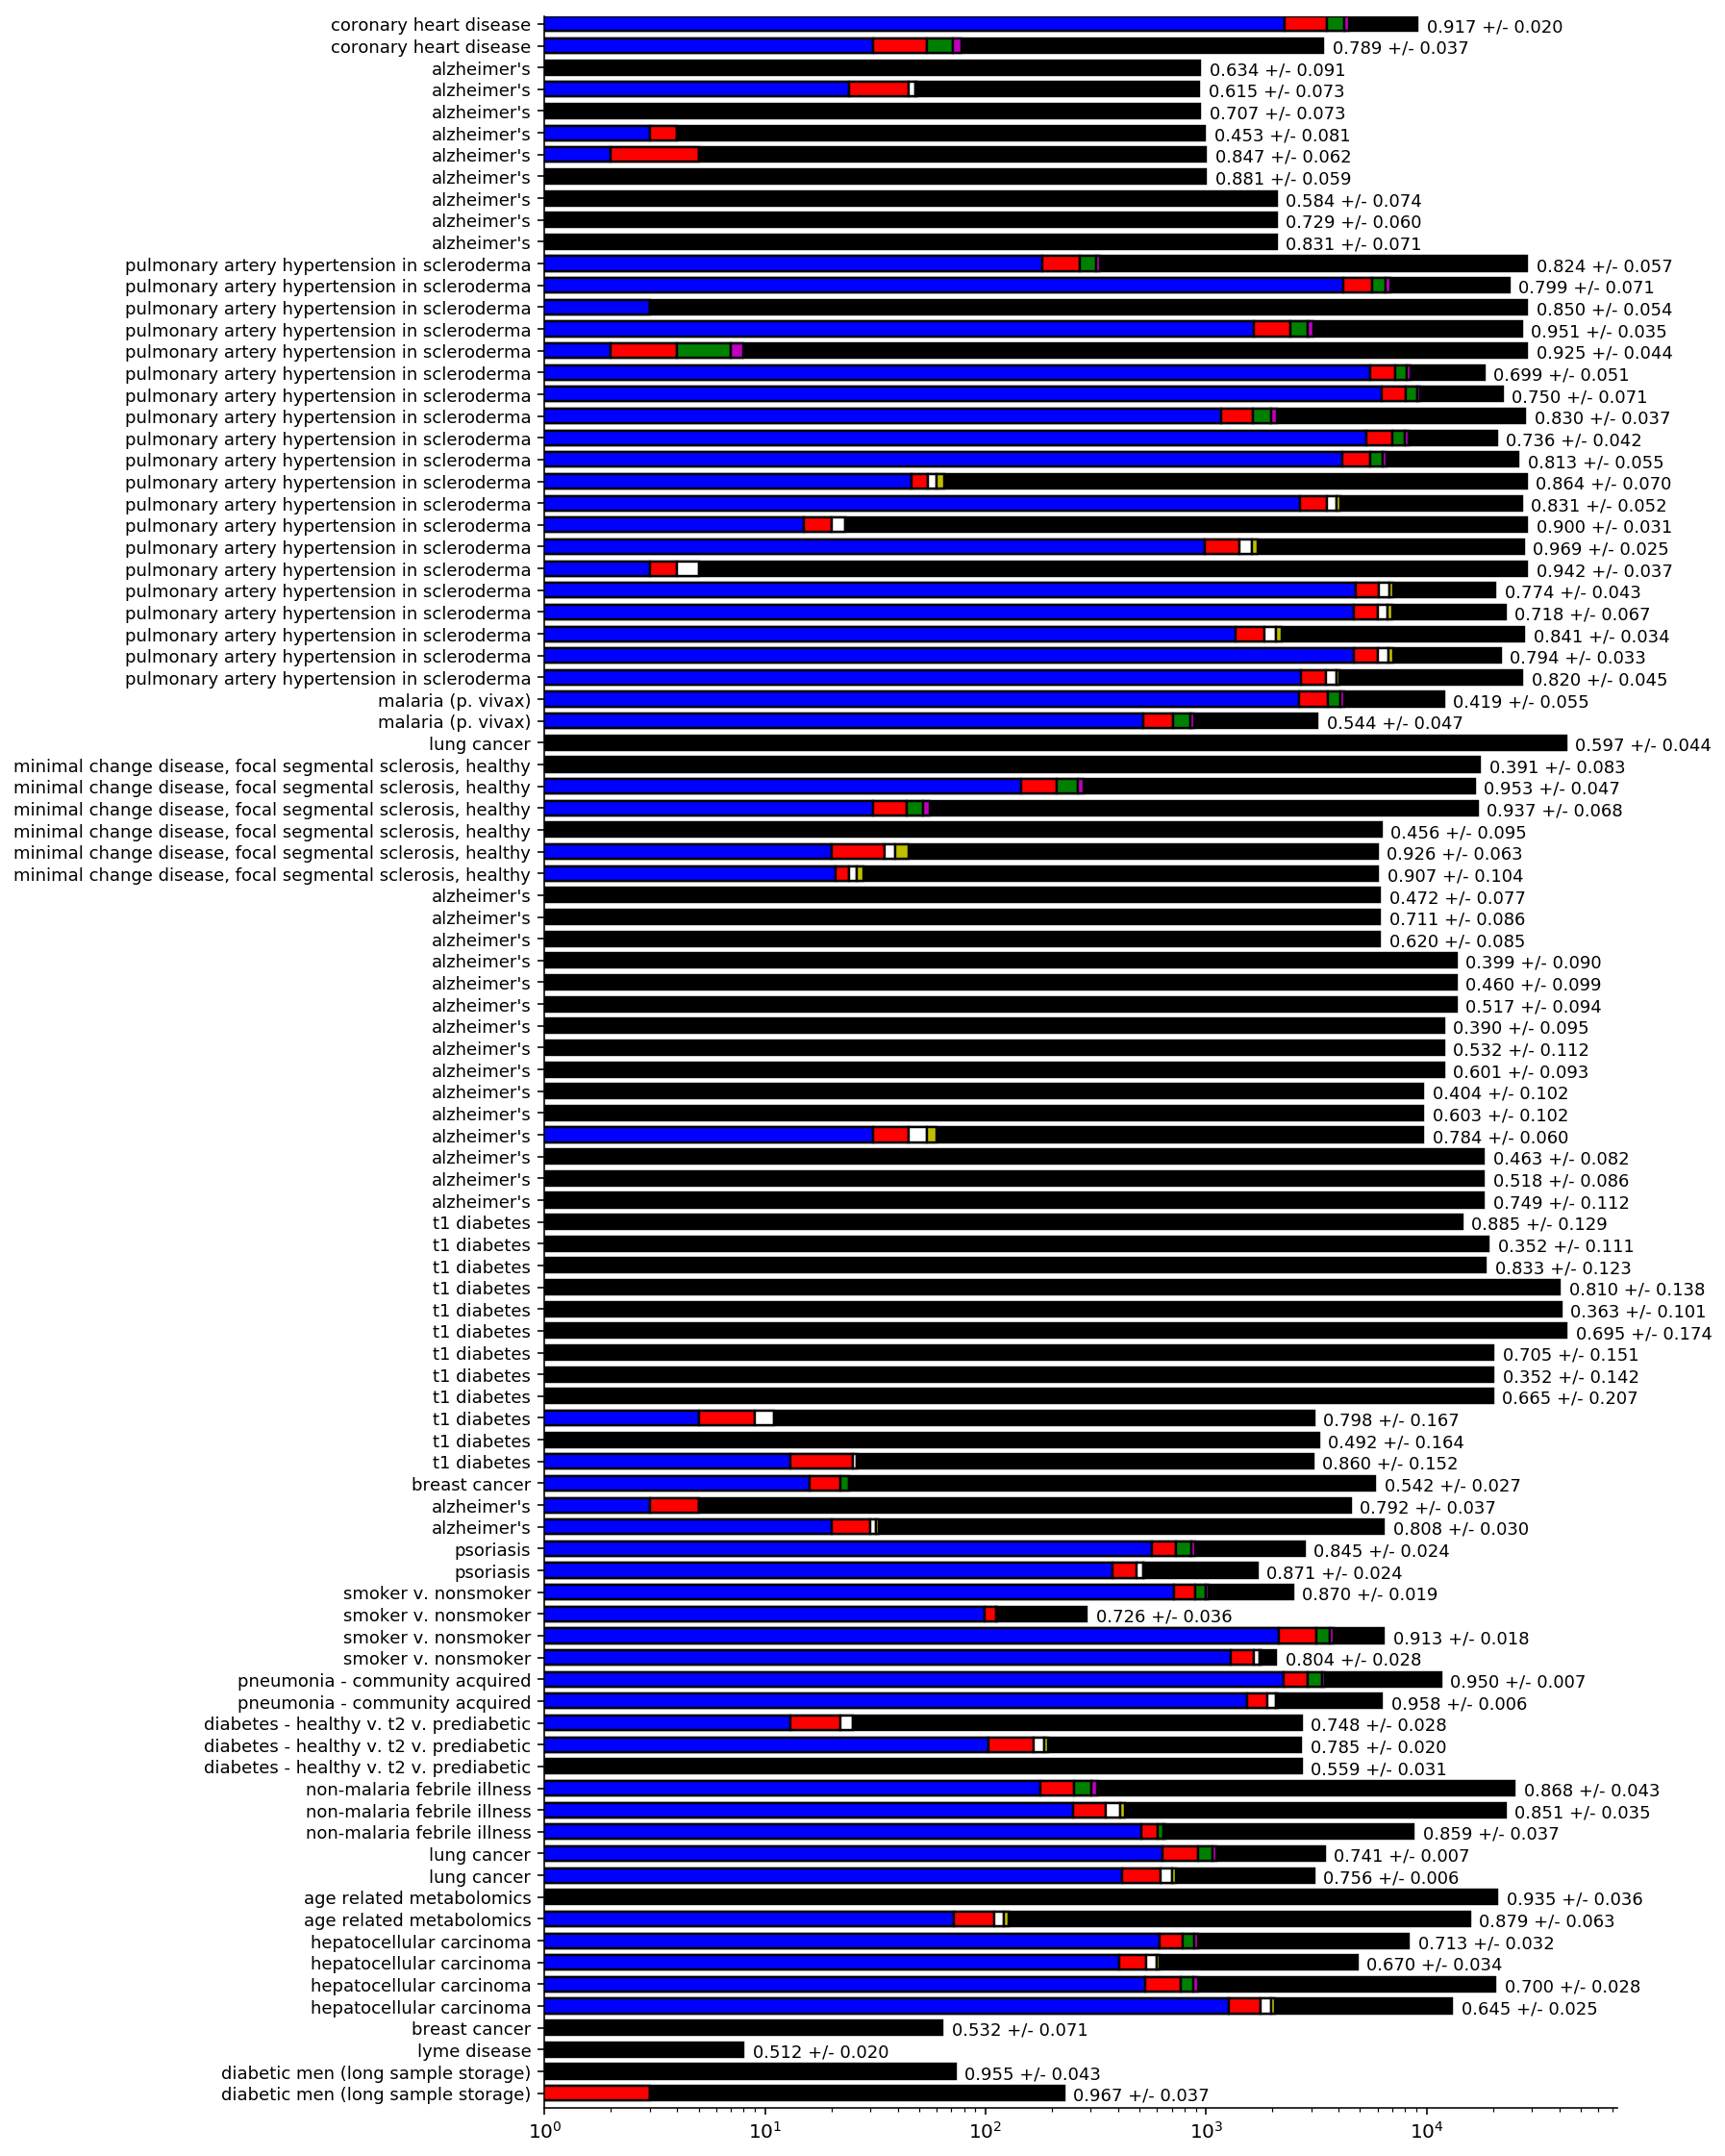

In [11]:
#### SI version of the figure 5 plot....this is the bar chat for each study
working_add_dict = adduct_dict.copy()

total_feats = []
one_c13 = []
two_c13 = []
add_na_or_cl = []
add_k_or_water_h = []

layer_3_color = []
layer_4_color = []

aucs = []
std = []
disease = []
disease_type = []
names = []
study = []

y_position = []
y = 1
for ds in working_add_dict:
#     aucs.append(individual_ds[individual_ds.analysis==ds]['auc'].tolist()[0])
#     std.append(individual_ds[individual_ds.analysis==ds]['auc_std'].tolist()[0])
#     disease.append(individual_ds[individual_ds.analysis==ds]['disease'].tolist()[0])
#     disease_type.append(individual_ds[individual_ds.analysis==ds]['disease_type'].tolist()[0])
#     study.append(individual_ds[individual_ds.analysis==ds]['study'].tolist()[0])
    aucs.append(nosig_LR_mod[nosig_LR_mod.analysis==ds]['auc'].tolist()[0])
    std.append(nosig_LR_mod[nosig_LR_mod.analysis==ds]['auc_std'].tolist()[0])
    disease.append(nosig_LR_mod[nosig_LR_mod.analysis==ds]['disease'].tolist()[0])
    disease_type.append(nosig_LR_mod[nosig_LR_mod.analysis==ds]['disease_type'].tolist()[0])
    study.append(nosig_LR_mod[nosig_LR_mod.analysis==ds]['study'].tolist()[0])
    names.append(ds)
    y_position.append(y)
    y += 3
    total_feats.append(len(working_add_dict[ds]['mz']))
    adduct_data = working_add_dict[ds]['adducts']
    if len(adduct_data) == 0:
        one_c13.append(0)
        two_c13.append(0)
        add_na_or_cl.append(0)
        add_k_or_water_h.append(0)
    
    if working_add_dict[ds]['mode'] == 'positive':
        layer_3_color.append('g')
        layer_4_color.append('m')
        one_c13.append(len(adduct_data[0]))
        two_c13.append(len(adduct_data[1]))
        add_na_or_cl.append(len(adduct_data[2]))
        add_k_or_water_h.append(len(adduct_data[3]))
        
    else:
        layer_3_color.append('w')
        layer_4_color.append('y')
        one_c13.append(len(adduct_data[0]))
        two_c13.append(len(adduct_data[1]))
        add_na_or_cl.append(len(adduct_data[2]))
        add_k_or_water_h.append(len(adduct_data[3]))
        
l_2 = [e1+e2 for e1, e2 in zip(one_c13,two_c13)]
l_3 = [e1+e2 for e1, e2 in zip(l_2,add_na_or_cl)]
total_add = [e1+e2 for e1, e2 in zip(l_3,add_k_or_water_h)]
fraction = [e1/e2 for e1, e2 in zip(total_add, total_feats)] ######## use this in the next block

h = 2

fig = plt.figure(figsize=(10,20))
ax = plt.subplot()

ax.set_yticklabels([])
ax.yaxis.set_ticks(np.arange(1, y_position[-1]+1, 3))
ax.set_ylim([-1,y_position[-1]+1])
ax.set_yticklabels(disease, fontname='Dejavu Sans', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1 = ax.barh(y_position, total_feats, height=h, color='k', linewidth=1.2, edgecolor='k')
p2 = ax.barh(y_position, one_c13, height=h, color='b', linewidth=1.2, edgecolor='k')
p3 = ax.barh(y_position, two_c13, left=one_c13, height=h, color='r', linewidth=1.2, edgecolor='k')
p3 = ax.barh(y_position, add_na_or_cl, left=l_2, height=h, color=layer_3_color, linewidth=1.2, edgecolor='k')
p3 = ax.barh(y_position, add_k_or_water_h, left=l_3, height=h, color=layer_4_color, linewidth=1.2, edgecolor='k')
ax.set_xscale('log')
for a, a_std, x_pos, y_pos in zip(aucs, std, total_feats, np.arange(0, y_position[-1]+1, 3)):
    pad = x_pos*0.1
    ax.text(x_pos+pad,y_pos, '{0:.3f} +/- {1:.3f}'.format(a,a_std), fontname='Dejavu Sans', fontsize=9)
# plt.savefig('Figure_5_SI_adduct_breakdown.svg', format='svg', dpi=1000, bbox_inches='tight')
# plt.show()

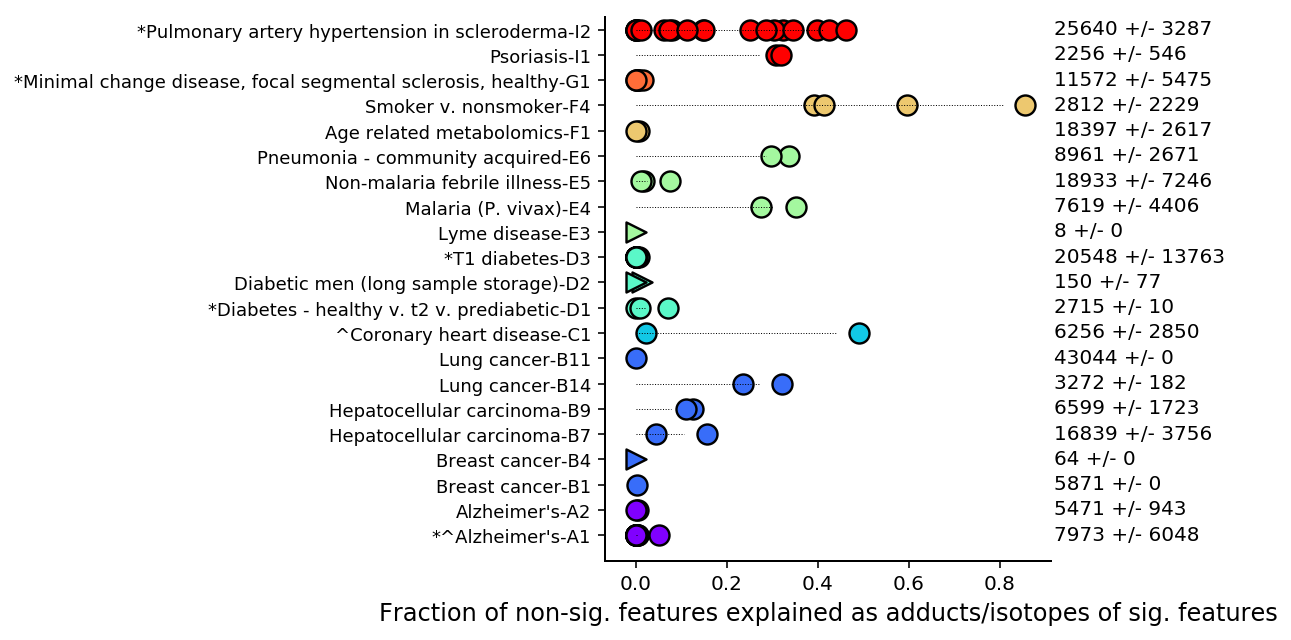

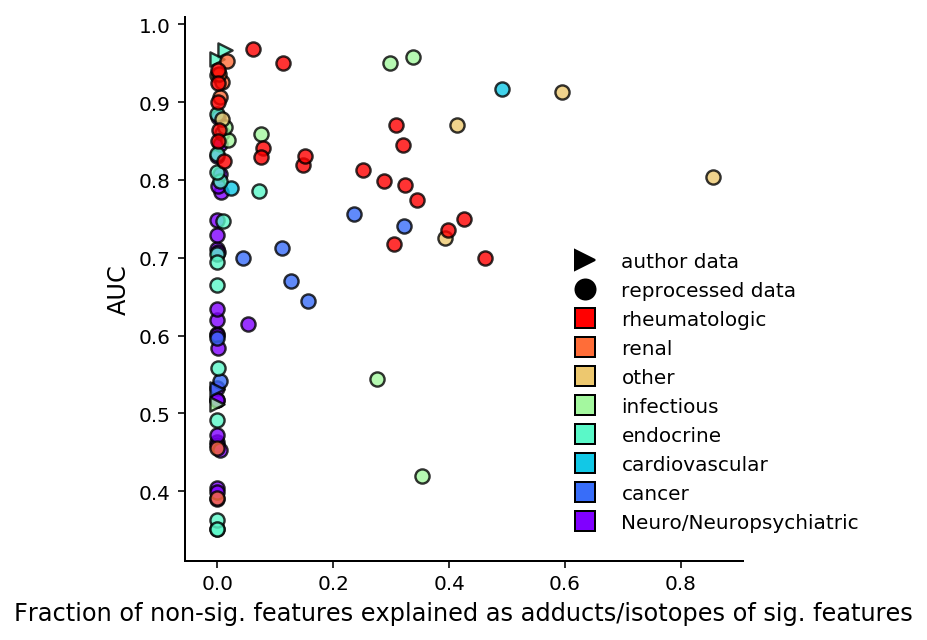

-0.05831581518631258


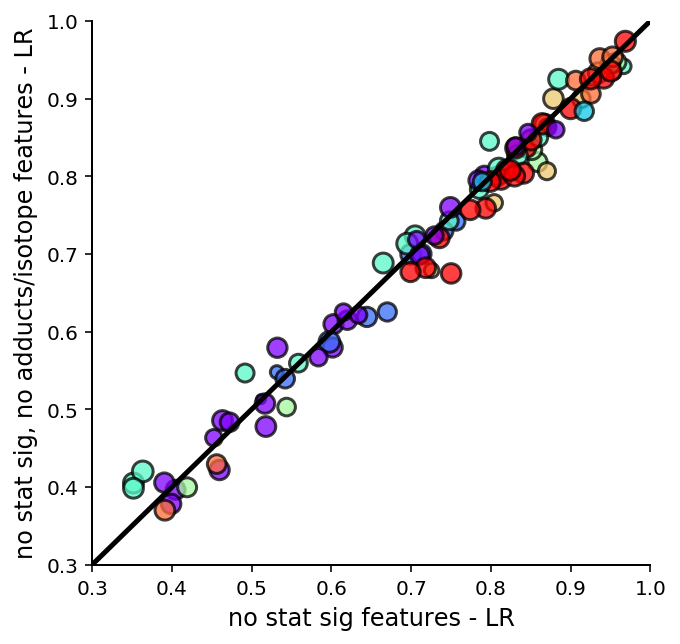

In [12]:
### paper figure 5, pretty plot

######### FYI YOU CANT RUN THIS CELL TWICE IN A ROW WITHOUT RUNNING THE ONE ABOVE FIRST....ORDERING GETS MESSED UP
######### ^ NOTE TO PEOPLE (HI!) READING / REPRODUCING THIS ^######

# plot like other plots with single studies per row but in individual ds are a scatter plot dot on the row
def get_biggest_study_auc(xs,ys):
    x_line, y_line = [], []
    best_x_for_y = {i:0 for i in set(ys)}
    for x_, y_ in zip(xs,ys):
        if x_ > best_x_for_y[y_]:
            best_x_for_y[y_] = x_
    for k,v in sorted(best_x_for_y.items()):
        x_line.append(v)
        y_line.append(k)
    return x_line, y_line

############################
### get the x's = just the fractions 
x = fraction

## get marker shapes:
shapes = ['o' if ('IPO' in name or 'XCMS' in name or 'reprocessed' in name) else '>'for name in names]

#### sort everything to make order nice and colors match!:
disease_types_n = [nosig_LR_mod[nosig_LR_mod.analysis==ds]['disease_type'].tolist()[0] for ds in names]
to_sort = [(x_i, dis_type, s, d, st, ac, t_feat) for x_i,  dis_type, s, d, st, ac, t_feat in zip(x, disease_types_n, shapes, disease, study, aucs, total_feats)]
order = nosig_LR_mod.study.unique()
sorted_data = []
for ele in order:
    for info in to_sort:
        if ele in info:
            sorted_data.append(info)
to_sort = sorted_data
x = [ele[0] for ele in to_sort]
disease_types = [ele[1] for ele in to_sort]
shapes = [ele[2] for ele in to_sort]
disease = [ele[3] for ele in to_sort]
study = [ele[4] for ele in to_sort]
aucs = [ele[5] for ele in to_sort]
all_features = [ele[-1] for ele in to_sort]
### get y values for the sorted data
y_value = 0
y = []
seen = []
d_names = []
y_step = 2
feat_ct = []
study_avg_feat = []
study_std_feat = []
current_s = None
for d, s, f_c in zip(disease, study, all_features):
    if s in seen:
        y.append(y_value)
        feat_ct.append(f_c)
    else:
        if current_s == None:
            current_s = s
            feat_ct.append(f_c)
        else:
            if s != current_s:
                study_avg_feat.append(np.asarray(feat_ct).mean())
                study_std_feat.append(np.asarray(feat_ct).std())
                feat_ct = [f_c]
                current_s = s
            else:
                feat_ct.append(f_c)
        d_names.append(d)
        y_value += y_step
        seen.append(s)
        y.append(y_value)
## get the last study since the loop doesnt...
study_avg_feat.append(np.asarray(feat_ct).mean())
study_std_feat.append(np.asarray(feat_ct).std())

o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
not_combined = ['Feng', 'ST000046']
study_spec = {study:'' for study in list(nosig_LR_mod.study.unique())}
for study in o_v_o:
    study_spec[study] += '*'
for study in not_combined:
    study_spec[study] += '^'
labels = [ele[0].upper()+ele[1:] for ele in d_names]
temp_y_labels = ['{}{}'.format(study_spec[study], disease) for study,disease in zip(seen,labels)]
updated_names = {'*Copd':'*COPD', 'Malaria (p. vivax)': 'Malaria (P. vivax)'}
y_labs = []
for ele in temp_y_labels:
    if ele in updated_names:
        y_labs.append(updated_names[ele])
    else:
        y_labs.append(ele)
temp_y_labels = y_labs

### get the colors for each study: 
cmap = matplotlib.cm.get_cmap('rainbow')
disease_types_unique = sorted(list(set(disease_types)))
disease_to_num = {disease:i for i,disease in enumerate(disease_types_unique)}
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
colors = [disease_to_num[dis] for dis in disease_types]
disease_to_color_legend = [(disease,cmap(color_fractions[disease_to_num[disease]])) for disease in disease_to_num]
d_to_color_leg_used = []
for ele in disease_to_color_legend:
    if ele[0] in disease_type:
        d_to_color_leg_used.append(ele)
        
#### get colors from new sorting
colors = [cmap(color_fractions[ele]) for ele in colors]

### start plotting:
fig = plt.figure(figsize=(4,5))
ax = plt.subplot()
    
### plot the actual fraction data
for x_,y_,m_,c_ in zip(x,y,shapes,colors): 
    ax.scatter(x_, y_, marker=m_, c=c_, s=100, alpha=1, cmap='rainbow', linewidth=1.2, edgecolor='k')
    
#### add some lines to lowest point...
line_x,line_y = get_biggest_study_auc(x,y)
for x_, y_ in zip(line_x, line_y):
    if x_ > 0.05:
        ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)
        
#### make plot look nice
ax.set_yticklabels([])
ax.yaxis.set_ticks(np.arange(2, y[-1]+1, y_step))
ax.set_ylim([0,y[-1]+1])
label_ID = ['A1','A2','B1','B4','B7','B9','B14','B11','C1',
            'D1','D2','D3','E3','E4','E5','E6','F1','F4','G1','I1','I2']
temp_y_labels = [e1+'-'+e2 for e1, e2 in zip(temp_y_labels,label_ID)]
ax.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.set_xlabel('Fraction of non-sig. features explained as adducts/isotopes of sig. features', fontname='Dejavu Sans', fontsize=12)
# for a, a_std, x_pos, y_pos in zip(aucs, std, total_feats, np.arange(0, y_position[-1]+1, 3)):
#     pad = x_pos*0.1
#     ax.text(x_pos+pad,y_pos, '{0:.3f} +/- {1:.3f}'.format(a,a_std), fontname='Dejavu Sans', fontsize=9)
unique_y = list(set(y))
unique_y = [ele-0.35 for ele in unique_y]
for f_avg, f_std, y in zip(study_avg_feat,study_std_feat,unique_y):
    ax.text(0.92,y,'{} +/- {}'.format(int(f_avg),int(f_std)))

## make the legend info:
legend_data = [['author data', 'k', 'k', '>'],
               ['reprocessed data', 'k', 'k', 'o']]
for ele in d_to_color_leg_used[::-1]:
    legend_data.append([ele[0], ele[1], 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=10)
plt.savefig('Figure_5b.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()


### plot fraction v auc
### show on this plot fraction of studies to left and right of say 0.2 for % of adduct features
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
for x_,y_,m_,c_ in zip(x,aucs,shapes,colors): 
    ax.scatter(x_, y_, marker=m_, c=c_, s=50, alpha=0.8, cmap='rainbow', linewidth=1.2, edgecolor='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Fraction of non-sig. features explained as adducts/isotopes of sig. features', fontname='Dejavu Sans', fontsize=12)
ax.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(0.65, 0.6), frameon=False, prop=font)
plt.savefig('Figure_5c.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

############### figure 5d
nosig_noadd_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_True_rem_add_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
nosig_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
nosig_noadd_LR = nosig_noadd_LR.replace('ST000389', 'ST000388')
nosig_noadd_LR = df_naming_cleanup(nosig_noadd_LR)
nosig_noadd_LR = nosig_noadd_LR.sort_values(by=['analysis'])
nosig_LR = nosig_LR.replace('ST000389', 'ST000388')
nosig_LR = df_naming_cleanup(nosig_LR)
nosig_LR = nosig_LR.sort_values(by=['analysis'])
# mask the nosig_LR to just the nosig_noadd data sets
ds_nosig_no_add = list(nosig_noadd_LR.analysis)
nosig_LR = nosig_LR[nosig_LR.analysis.isin(ds_nosig_no_add)]

### plotting like above...
### getting colors:
disease_types_unique = nosig_LR.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(nosig_LR.disease_type)
# print(disease_types_unique)
disease_to_num = {disease:i for i,disease in enumerate(sorted(disease_types_unique))}
colors = [disease_to_num[disease] for disease in disease_types]
cmap = matplotlib.cm.get_cmap('rainbow')
# colors for legend
disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}

diff = nosig_LR.auc-nosig_noadd_LR.auc
print(diff.mean(axis=0))
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.scatter(nosig_LR.auc, nosig_noadd_LR.auc, s=10*np.log(nosig_noadd_LR.features), alpha=0.75, linewidth=1.5, c=colors, edgecolor='k', cmap='rainbow')
ax.set_xlim([0.3,1])
ax.set_ylim([0.3,1])
ax.plot([0,1],[0,1], 'k', linewidth=2.5)
ax.set_xlabel('no stat sig features - LR', fontname='Dejavu Sans', fontsize=12)
ax.set_ylabel('no stat sig, no adducts/isotope features - LR', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
plt.savefig('Figure_5d.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

### now to look at the left over features...can we learn about them? especially for the data sets where there is still good performance

In [13]:
### questions for the high auc models...why do they work...? what are the features? 
no_stat_add_iso = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_True_rem_add_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))
no_stat = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))
all_feat = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))

In [14]:
interesting_ds = {}
for s,dss in no_stat_add_iso.items():
    for ds in dss:
        if ds['auc'] > 0.8:
            if s in interesting_ds:
                interesting_ds[s].append(ds)
            else:
                interesting_ds[s] = [ds]

In [15]:
#### get the 'interesting' datasets from just the others pickles
new_no_stat = {}
new_all_feat = {}
for s,dss in interesting_ds.items():
    new_no_stat[s] = []
    new_all_feat[s] = []
    for ds in dss:
        name = ds['data_set']
        for k,v in no_stat.items():
            for d in v:
                if d['data_set'] == name:
                    new_no_stat[s].append(d)
        for k,v in all_feat.items():
            for d in v:
                if d['data_set'] == name:
                    new_all_feat[s].append(d)

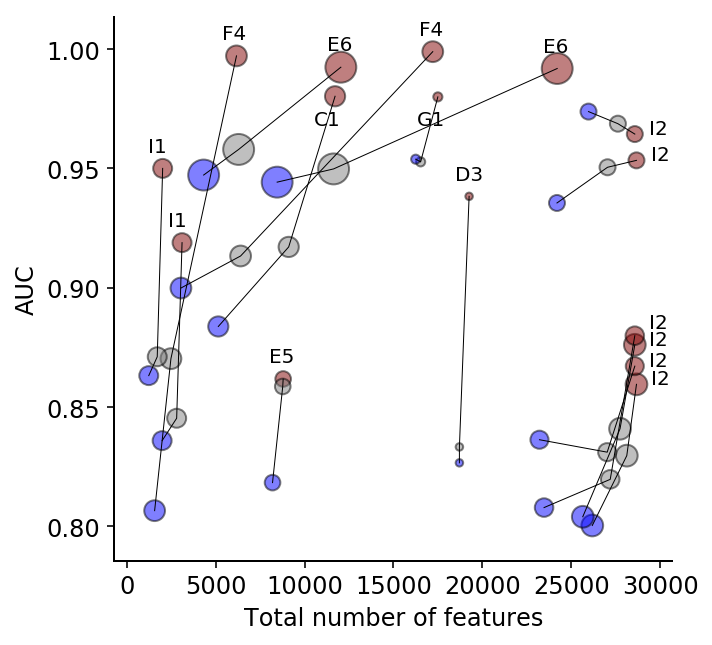

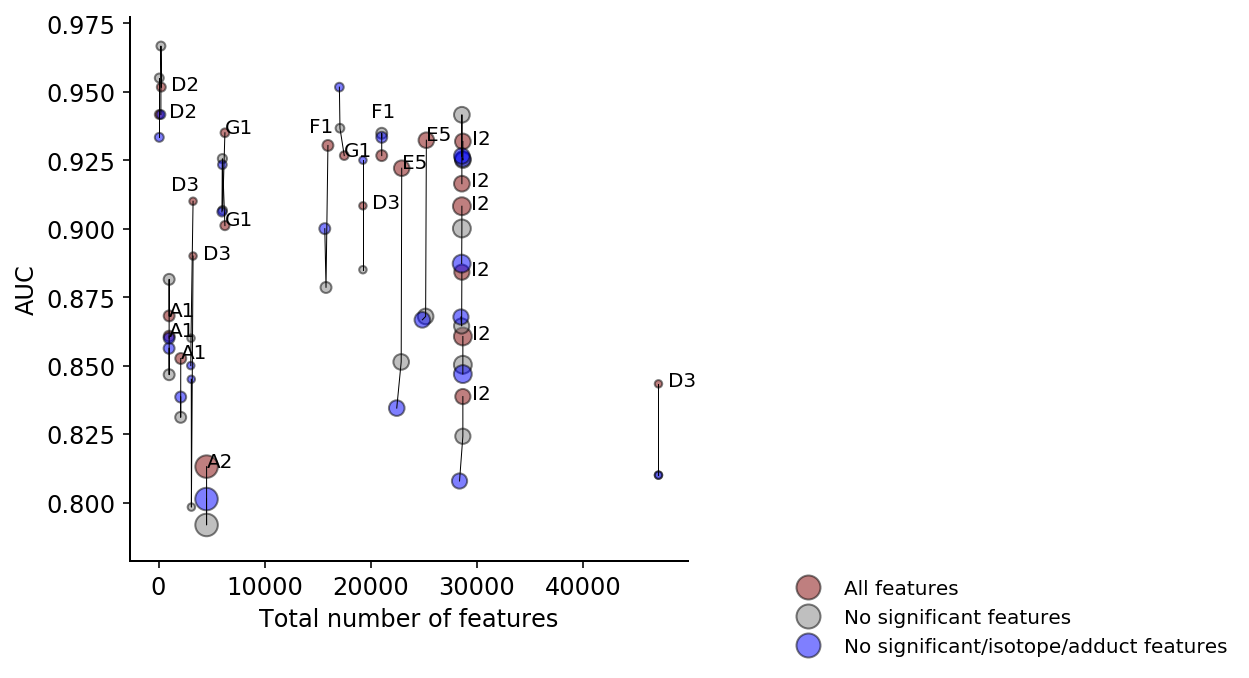

In [16]:
### hello fellow code traveler and (hopefully) friend:
### this includes a rather inelegant mapping of ID to the data points...lol sorry if you're looking at this, do email 
### if you know a better way - eevans@mit.edu (if im still there, otherwise eeevans@colorado.edu since its a gmail)
### also thanks for taking the time to read this and get to this point in the code, this was a moving project so things
### got messy (as I find with most juypter notebook based projects - i much prefer to work in sublime and run on command line)
### if you have thoughts, reproducability issues etc do reach out or areas you want to collaborate, though i cant promise 
### ill have the time since i tend to add 5 new projects before finishing even 1...heh funny how science works

all_feat = []
all_auc = []
no_sig_feat = []
no_sig_auc = []
no_sig_no_add_feat = []
no_sig_no_add_auc = []
sizes = []
ds_type = []
studies = []
num_sig = []
for s,dss in new_all_feat.items():
    for ds in dss:
        all_feat.append(ds['features'].shape[1])
        num_sig.append(ds['significant'])
        all_auc.append(ds['auc'])
        sizes.append(ds['features'].shape[0])
        ds_type.append(ds['disease'])
        studies.append(ds['study'])
for s,dss in new_no_stat.items():
    for ds in dss:
        no_sig_feat.append(ds['features'].shape[1])
        no_sig_auc.append(ds['auc'])
for s,dss in interesting_ds.items():
    for ds in dss:
        no_sig_no_add_feat.append(ds['features'].shape[1])
        no_sig_no_add_auc.append(ds['auc'])  
studies_ID = [name_to_id[s] for s in studies]
studies_ID = np.asarray([studies_ID])
feats = np.asarray([all_feat,no_sig_feat,no_sig_no_add_feat])
aucs = np.asarray([all_auc, no_sig_auc, no_sig_no_add_auc])
sizes = np.asarray([sizes,sizes,sizes])
feats_large_delta = feats[:,feats[2,:]-feats[0,:]<-500]
aucs_large = aucs[:,feats[2,:]-feats[0,:]<-500]
sizes_large = sizes[:,feats[2,:]-feats[0,:]<-500]
feats_small_delta = feats[:,feats[2,:]-feats[0,:]>-500]
aucs_small = aucs[:,feats[2,:]-feats[0,:]>-500]
sizes_small = sizes[:,feats[2,:]-feats[0,:]>-500]
studies_ID_large = studies_ID[:,feats[2,:]-feats[0,:]<-500].tolist()[0]
studies_ID_small = studies_ID[:,feats[2,:]-feats[0,:]>-500].tolist()[0]

fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(feats_large_delta, aucs_large,'k-', linewidth=0.5)
colors =np.asarray([(0.5, 0.0, 0.0, 0.7),(0.5, 0.5, 0.5, 0.7),'b']).reshape((3,1))
colors = np.tile(colors, feats_large_delta.shape[1])
ax.scatter(feats_large_delta,aucs_large, c=colors.flatten(), s=sizes_large, alpha=0.5, edgecolor='k', linewidth=1)
ax.set_xlabel('Total number of features', fontname='Dejavu Sans', fontsize=12)
ax.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for x,y,t in zip(list(feats_large_delta[0]), list(aucs_large[0]),studies_ID_large):
    if 'I1' in t or 'F4' in t or 'E6' in t or 'D3' in t or 'E5' in t:
        x -= 800
        y += 0.007
    elif 'C1' in t or 'G1' in t:
        x -= 1200
        y -= 0.012
    else:
        x += 800
        if y == 0.8799498456790124:
            y+=0.003
    ax.text(x,y,t)
for tick in ax.get_yticklabels():
    tick.set_fontname("Dejavu Sans")
    tick.set_fontsize(12)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
for tick in ax.get_xticklabels():
    tick.set_fontname("Dejavu Sans")
    tick.set_fontsize(12)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
plt.savefig('Figure_5e_1.svg', format='svg', dpi=1000, bbox_inches='tight')


fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.plot(feats_small_delta, aucs_small,'k-', linewidth=0.5)
colors =np.asarray([(0.5, 0.0, 0.0, 0.7),(0.5, 0.5, 0.5, 0.7),'b']).reshape((3,1))
colors = np.tile(colors, feats_small_delta.shape[1])
ax1.scatter(feats_small_delta,aucs_small, c=colors.flatten(), s=sizes_small, alpha=0.5, edgecolor='k',linewidth=1)
ax1.set_xlabel('Total number of features', fontname='Dejavu Sans', fontsize=12)
ax1.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Dejavu Sans")
    tick.set_fontsize(12)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Dejavu Sans")
    tick.set_fontsize(12)
for x,y,t in zip(list(feats_small_delta[0]), list(aucs_small[0]),studies_ID_small):
    if 'D' in t or 'I' in t:
        x += 900
        y -= 0.001
    if 'D3' in t and x < 10000 and y > 0.9:
        x -= 3000
        y += 0.005
    if 'F' in t:
        x -= 1000
        y += 0.005
        if x < 20000:
            x -= 800
        else:
            y += 0.009
    ax1.text(x,y,t)
ax1.spines['left'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
legend_data = [['All features', (0.5, 0.0, 0.0, 0.7), 'k', 'o'],
               ['No significant features', (0.5, 0.5, 0.5, 0.7) , 'k', 'o'],
               ['No significant/isotope/adduct features', 'b' , 'k', 'o']]
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=12, alpha=0.5))
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=10)
lgd = ax1.legend(handles=patches_bar, bbox_to_anchor=(2, 0), frameon=False, prop=font)
plt.savefig('Figure_5e_2.svg', format='svg', dpi=1000, bbox_inches='tight')
plt.show()

In [217]:
#### calculate the fold enrichment for a given dataset
def calc_enrichment(dataset):
    X = dataset['features'].values.copy()
    X[np.isinf(X)] = 0
    X[X<0] = 0
    y = dataset['labels'].values.ravel()
    y = np.asarray([int(i) for i in y])
    delta = np.zeros(X.shape[1]) + np.nan
    
    for i in range(X.shape[1]):
        feat_data = []
        for j in dataset['label_set']:
            try:
                X_0 = X[y==j,i]
                X_0 = X_0[~np.isnan(X_0)]
                feat_data.append(X_0)
            except:
                pass 
        delta[i] = feat_data[1].mean()/feat_data[0].mean()
    dataset['enrichment'] = delta

### remove the not used studies
### then calc whether a feature is enriched in the case or controls
ds_to_study = interesting_ds.copy()

for study in ds_to_study:
    for sub_study in ds_to_study[study]:
        print(sub_study['data_set'])
        calc_enrichment(sub_study)

serum_onebatch_IPO_align_Feng_serum_all
urine_onebatch_IPO_aligned_Feng_urine_all
IPO_aligned_MTBLS17_neg_onebatch
IPO_aligned_MTBLS17_pos_onebatch
IPO_aligned_MTBLS19_neg_all_F_R
IPO_aligned_MTBLS19_pos_all_F_R
IPO_aligned_MTBLS266_neg
IPO_aligned_MTBLS266_pos
IPO_aligned_MTBLS28_neg
IPO_aligned_MTBLS28_pos
IPO_aligned_MTBLS315_mzXML
IPO_aligned_MTBLS315_n_mzML
IPO_aligned_MTBLS315_p_mzML
IPO_aligned_MTBLS352_neg_T2D_NGT
IPO_aligned_MTBLS352_neg_T2D_Pre-DM
IPO_aligned_MTBLS352_neg_NGT_Pre-DM
IPO_aligned_MTBLS354_neg
IPO_aligned_MTBLS354_pos
IPO_aligned_MTBLS364_hil_neg
IPO_aligned_MTBLS364_hil_pos
IPO_aligned_MTBLS364_lip_neg
IPO_aligned_MTBLS364_lip_pos
IPO_aligned_MTBLS408_neg
IPO_aligned_MTBLS408_pos
IPO_aligned_MTBLS72_neg
IPO_aligned_MTBLS72_pos
IPO_aligned_MTBLS92
IPO_aligned_ST000045_2feb_pos_ND_II
IPO_aligned_ST000045_2feb_pos_ND_IW
IPO_aligned_ST000045_2feb_pos_II_IW
IPO_aligned_ST000045_11feb_neg_ND_II
IPO_aligned_ST000045_11feb_neg_ND_IW
IPO_aligned_ST000045_11feb_neg_II_IW

#### want to look at the feature intensities relative to others and especially the significant features 

In [21]:
### reload these data sets since all_feat changes above!
no_stat_add_iso = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_True_rem_add_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))
no_stat = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))
all_feat = pickle.load(open('./paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl', 'rb'))
### need to load in the feature tables. 
path = './pickles/*.pkl'
non_bn_datasets = OrderedDict()
for fn in sorted(glob.glob(path)):
    data = pd.read_pickle(open(fn,'rb'), compression=None)
    non_bn_datasets[data[0]['study']] = data

In [22]:
# get the datasets in the no_stat_add_iso dict
def match_ds_dicts(remove_from_dict, map_to_dict,check_match = False):
    to_remove = []
    for k,v in remove_from_dict.items():
        if k == 'MTBLS19':
            k = 'MTBLS19_data'
        if k not in map_to_dict:
            to_remove.append(k)
    for ele in to_remove:
        del remove_from_dict[ele]
    ## two fixed to get things aligned
    correct = False
    try:
        remove_from_dict['MTBLS19_data'] = remove_from_dict['MTBLS19']
        del remove_from_dict['MTBLS19']
    except:
        ### ie its already correct
        correct = True
        pass
    for ds in remove_from_dict['Feng']:
        if 'serum' in ds['data_set'] and 'MSMS' in ds['data_set']:
            ds['data_set'] = 'serum_onebatch_IPO_align_Feng_serum_all'
        elif 'urine' in ds['data_set'] and 'MSMS' in ds['data_set']:
            ds['data_set'] = 'urine_onebatch_IPO_aligned_Feng_urine_all'
        else:
            pass
    if correct:
        ## MTBLS315: IPO_aligned_MTBLS315_mzData, ST000608: AN000931
        ### there have 1 more ds in all_feat and no_stat_add_iso due to GC or low res studies
        remove_from_dict['MTBLS315'] = remove_from_dict['MTBLS315'][1:]
        remove_from_dict['ST000608'] = remove_from_dict['ST000608'][:-1]    
        if check_match:
            for k in remove_from_dict:
                print(len(remove_from_dict[k]), len(map_to_dict[k]))
        return remove_from_dict
    ### extract only the matching data sets
    ds_names_to_keep = [] # list of data set names to keep
    for k,v in map_to_dict.items():
        for ele in v:
            ds_names_to_keep.append(ele['data_set'])
    ### new dict that will be used for subsequent analysis:
    non_bn_matched_ds = {}
    for k,v in non_bn_datasets.items():
        non_bn_matched_ds[k] = []
        for ele in v:
            if ele['data_set'] in ds_names_to_keep:
                non_bn_matched_ds[k].append(ele)     
    if check_match:
        for k in non_bn_matched_ds:
            print(len(non_bn_matched_ds[k]),len(map_to_dict[k]))
    return non_bn_matched_ds

min_non_bn_all_feat_match = match_ds_dicts(non_bn_datasets, no_stat_add_iso)        
min_bn_all_feat_match = match_ds_dicts(all_feat, no_stat_add_iso) 

In [23]:
### make sure the datasets are the same and the feature matricies are the same size
compare_size = False
if compare_size:
    for k,v in min_non_bn_all_feat_match.items():
        for ds in v:
            print('1',ds['data_set'],ds['features'].shape)
            for ds_2 in min_bn_all_feat_match[k]:
                if ds['data_set'] == ds_2['data_set']:
                    print(ds_2['data_set'],ds_2['features'].shape)

In [ ]:
# ok have matching data: min_non_bn_all_feat_match, min_bn_all_feat_match, no_stat_add_iso
### here we fill in the nan's etc in the non BN data just so we can get avg intensity values etc for features
log = True

pre_norm_ds = [ 'plasmaall_author','urineall_author','m_oxylipin_chronic_hep_b','m_chronic_hep_b_POS','m_chronic_hep_b_NEG',
                'm_CER_mass_spectrometry_v4','m_CER_mass_spectrometry_v4_3_CS','m_CER_mass_spectrometry_v4_0_NS',
                'm_CER_mass_spectrometry_v4_2_FS','m_CER_mass_spectrometry_v4_1_COPD','m_EICO_mass_spectrometry_v4',
                'm_EICO_mass_spectrometry_v4_3_CS','m_EICO_mass_spectrometry_v4_0_NS','m_EICO_mass_spectrometry_v4_2_FS',
                'm_EICO_mass_spectrometry_v4_1_COPD','AN000580','AN000581','AN001503','ulsam_author']
def check_pre_norm(ds):
    if ds['data_set'] in pre_norm_ds:
        ds['pre_norm'] = 'Yes'
    else:
        ds['pre_norm'] = 'No'
    return ds
def convert_nan_to_val(data, value=0):
    data[pd.isnull(data)] = value
    return data

### make sure the non_bn data have pre_norm labels and also fills nan's
for k, v in min_non_bn_all_feat_match.items():
    for ds in v:
        ds = check_pre_norm(ds)
        X = ds['features']  
        X[np.isinf(X)] = 0
        X = convert_nan_to_val(X, value=0)
        X[X<0] = 0
        print(ds['pre_norm'], ds['data_set'])
        if log and ds['pre_norm'] == 'No':
            X[X<1] = 1
            ds['log_features'] = np.log2(X)

No serum_onebatch_IPO_align_Feng_serum_all
No urine_onebatch_IPO_aligned_Feng_urine_all
No IPO_aligned_MTBLS17_neg_onebatch
No IPO_aligned_MTBLS17_pos_onebatch
No IPO_aligned_MTBLS266_neg
No IPO_aligned_MTBLS266_pos
No IPO_aligned_MTBLS28_neg
No IPO_aligned_MTBLS28_pos
No IPO_aligned_MTBLS315_mzXML
No IPO_aligned_MTBLS315_n_mzML
No IPO_aligned_MTBLS315_p_mzML


In [ ]:
# ok so the bn data has the pvalues for all features...use it to mask the non_bn data
# alternatively, i think the feature labels for the no_stat_add_iso can be used to mask the non_bn data
#### trying first with p values:
from scipy.stats import kruskal, mannwhitneyu

studies_no_stat_add_iso = []
for k,v in no_stat_add_iso.items():
    for ds in v:
        studies_no_stat_add_iso.append(ds['data_set'])

only_stat = False
remove_all = True
get_top_p_coefs = True

nosig_noadd_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_True_rem_add_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv').set_index('study')
if only_stat:
    for k,v in min_bn_all_feat_match.items():
        for ele in v:
            if ele['data_set'] not in studies_no_stat_add_iso:
                continue
            ps = ele['pvalues']
            for ds in min_non_bn_all_feat_match[k]:
                if ds['data_set'] == ele['data_set']:
                    print(ds['data_set'])
                    if ds['pre_norm'] == 'No':
                        ds['nonsig_feat'] = ds['log_features'].iloc[:,ps>=0.05]
                        ds['sig_feat'] = ds['log_features'].iloc[:,ps<0.05]
                    else:
                        ds['nonsig_feat'] = ds['features'].iloc[:,ps>=0.05]
                        ds['sig_feat'] = ds['features'].iloc[:,ps<0.05]                    
                    avg_nonsig = ds['nonsig_feat'].mean(axis=0)
                    avg_sig = ds['sig_feat'].mean(axis=0)
                    fig = plt.figure(figsize=(4,4))
                    gs = gridspec.GridSpec(2,1)
                    ax1 = plt.subplot(gs[0])
                    ax2 = plt.subplot(gs[1],sharex=ax1)
                    ax1.hist(avg_nonsig, bins=20)
                    ax2.hist(avg_sig, bins=20,color='r')
                    plt.show()
if remove_all:
    study_name_repeated = []
    data = []
    data_ps = []
    data_labels = []
    data_diseases = []
    data_aucs = []
    data_aucs_std = []
    data_dis_type = []
    for k,v in no_stat_add_iso.items():
        for ele in v:
            non_sig_feat = list(ele['features'].columns)
            if get_top_p_coefs:
                coef_mat = np.array(ele['indiv_split_model_coefs'])
                coef_avg = coef_mat.mean(axis=0)
                coef_std = coef_mat.std(axis=0)
                cutoff = 0.005
                not_proper_cufoff = True
                while not_proper_cufoff: 
                    reduced = coef_avg[np.abs(coef_avg)>cutoff]
                    fract = reduced.shape[0] / coef_avg.shape[0]
                    if 0.095 <= fract <= 0.105:
#                     if 0.045 <= fract <= 0.055:
#                     if 0.005 <= fract <= 0.015:
                        not_proper_cutoff = False
                        break
                    if cutoff > 0.01:
                        not_proper_cutoff = False
                        break 
                    if cutoff < 0.00009:
                        not_proper_cutoff = False
                        break
#                     if fract > 0.005:
#                         cutoff += 0.000001
#                     elif fract < 0.015:
#                         cutoff -= 0.000001
#                     if fract > 0.055:
#                         cutoff += 0.000001
#                     elif fract < 0.045:
#                         cutoff -= 0.000001
                    if fract > 0.105:
                        cutoff += 0.000001
                    elif fract < 0.095:
                        cutoff -= 0.000001
                tf_array = np.abs(coef_avg) > cutoff
                non_sig_top_p_feat = np.asarray(non_sig_feat)[tf_array==True]
                
                #### looking at feature coef flipping across trainings...seems in general this doesnt occur, either on or off
#                 imp_full_coefs = coef_mat[:,tf_array==True]
#                 imp_full_coefs[imp_full_coefs>0] = 1
#                 imp_full_coefs[imp_full_coefs<0] = -1
#                 plt.matshow(imp_full_coefs)
#                 plt.show()

            for d in no_stat[k]:
                if d['data_set'] == ele['data_set']:
                    all_non_stat = list(d['features'].columns)
            for ds in min_non_bn_all_feat_match[k]:
                if ds['data_set'] == ele['data_set']:
                    dis_type = list(nosig_noadd_LR.loc[k,'disease_type'])[0]
                    if len(dis_type) == 1:
                        dis_type = nosig_noadd_LR.loc[k,'disease_type']
                    for i in [1,2]:
                        study_name_repeated.append(k)
                        data_diseases.append(ds['disease'])
                        data_labels.append(ds['data_set'])
                        data_aucs.append(ele['auc'])
                        data_aucs_std.append(ele['auc_std'])
                        data_dis_type.append(dis_type)
                    feat_names = list(ds['features'].columns)
                    sig_feat = [ele for ele in feat_names if ele not in all_non_stat]
                    if ds['pre_norm'] == 'No':
                        key_feat = 'log_features'
                    else:
                        key_feat = 'features'
                    if get_top_p_coefs:
                        ds['nonsig_feat'] = ds[key_feat].loc[:,non_sig_top_p_feat]
                        ds['sig_feat'] = ds[key_feat].loc[:,sig_feat]    
                    else:
                        ds['nonsig_feat'] = ds[key_feat].loc[:,non_sig_feat]
                        ds['sig_feat'] = ds[key_feat].loc[:,sig_feat]
                    if ds['sig_feat'].shape[1] == 0:
                        ds['corr_mat'] = ds['nonsig_feat']
                    elif ds['nonsig_feat'].shape[1] == 0:
                        ds['corr_mat'] = ds['sig_feat']
                    else:
                        ds['corr_mat'] = pd.concat([ds['nonsig_feat'],ds['sig_feat']],axis=1)
                    print(k, dis_type, ele['auc'], ds['nonsig_feat'].shape,ds['sig_feat'].shape)
                    
#                     ## pd.plotting.scatter_matrix(ds['corr_mat'], figsize=(5, 5))
#                     ## plt.show() 
                    #### looking at the avg feature coef vs mean intensity
#                     imp_coef_std = coef_mat[:,tf_array==True].std(axis=0)
#                     imp_coef_avg = coef_mat[:,tf_array==True].mean(axis=0)
#                     fig = plt.figure(figsize=(5,5))
#                     ax = plt.subplot()
#                     ax.scatter(imp_coef_avg, ds['nonsig_feat'].mean(axis=0))
#                     ax.errorbar(imp_coef_avg, ds['nonsig_feat'].mean(axis=0), xerr=imp_coef_std, fmt='none')
#                     plt.show()

                    ##### just plot the full correlation matrix for the combined nonsig_feats and the sig_feats:
#                     plt.matshow(ds['corr_mat'].corr(),vmin=-1, vmax=1)
#                     plt.colorbar()
#                     plt.show()

                    avg_nonsig = ds['nonsig_feat'].mean(axis=0)
                    avg_sig = ds['sig_feat'].mean(axis=0)
                    if avg_sig.shape[0] > 3:
                        _, p = mannwhitneyu(avg_nonsig,avg_sig, alternative='two-sided')
                        data_ps.append(p)
                        data_ps.append(p)
                    else:
                        data_ps.append('< 3 sig. feat')
                        data_ps.append('< 3 sig. feat')
                    data.append(avg_nonsig.tolist())
                    data.append(avg_sig.tolist())
                    break

In [ ]:
### split the data into the 'interesting' datasets and the non insteresting 
labels_high = []
labels_low = []
auc_high = []
auc_low = []
data_high = []
data_low = []
data_ps_high = []
data_ps_low = []
diseases_high = []
diseases_low = []
auc_std_high = []
auc_std_low = []
study_high = []
study_low = []
dis_type_high = []
dis_type_low = []
fixes = {'autoimmune': 'Rheumatologic', 'glomerular':'Renal', 'metabolic':'Endocrine',
         'neurological':'Neuro/Neuropsychiatric', 'cancer':'Cancer', 'other':'Other',
         'respiratory':'Respiratory', 'infectious':'Infectious', 'cardiovascular':'Cardiovascular'}

for auc, label, std, ps, dis, d, s, d_type in zip(data_aucs, data_labels, data_aucs_std, data_ps, data_diseases, data, study_name_repeated, data_dis_type):
    if d_type in fixes:
        d_type = fixes[d_type]
    if auc > 0.8:
        labels_high.append(label)
        auc_high.append(auc)
        data_high.append(d)
        data_ps_high.append(ps)
        diseases_high.append(dis)
        auc_std_high.append(std)
        study_high.append(s)
        dis_type_high.append(d_type)
    else:
        labels_low.append(label)
        auc_low.append(auc)
        data_low.append(d)
        data_ps_low.append(ps)
        diseases_low.append(dis)
        auc_std_low.append(std)
        study_low.append(s)
        dis_type_low.append(d_type)

In [ ]:
def make_labels(labels, lab_to_id_dict):
    return [lab_to_id_dict[lab] for lab in labels]
    
def get_color(labels):
    cmap = matplotlib.cm.get_cmap('rainbow')
    diff_colors = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
    c_fract = [i/(len(diff_colors)-1) for i in range(len(diff_colors))]
    label_to_color = {let:cmap(c_f) for let, c_f in zip(diff_colors, c_fract)}
    label_colors = [label_to_color[lab[0]] for lab in labels]
    return label_colors

def order_data(data, labels):
    sorted_data = []
    for d_type in data:
        temp = [(d,l) for d,l in zip(d_type,labels)]
        temp = sorted(temp, key=lambda x:x[1])
        n_dtype = [ele[0] for ele in temp]
        sorted_data.append(n_dtype)
    return sorted_data

def remove_drops(data, dropped_inds):
    dropped_data = []
    for d_type in data:
        dropped_data.append([d for i,d in enumerate(d_type) if i not in dropped_inds])
    return dropped_data

def reduce_labels(labels, ps, ds):
    lab_ps = [(l,p,d) for l,p,d in zip(labels,ps,ds)]
    lab_ps_dict = {}
    ind = 0
    for _ in lab_ps:
        if _ not in lab_ps_dict:
            lab_ps_dict[_] = ind
            ind += 1
    lab_ps = [(l_p_d, lab_ps_dict[l_p_d]) for l_p_d in lab_ps]
    lab_ps = list(set(lab_ps))
    lab_ps = [ele[0] for ele in sorted(lab_ps, key=lambda x:x[1])]
    r_lab = [ele[0] for ele in lab_ps]
    r_ps = [ele[1] for ele in lab_ps]
    r_ds = [ele[2] for ele in lab_ps]
    return r_lab, r_ps, r_ds

def fix_labels(labels):
    seen = []
    new_labels = []
    for ele in labels:
        if ele not in seen:
            i = 1
            seen.append(ele)
            new_labels.append(ele+'-{}'.format(i))
        else:
            i+=1
            new_labels.append(ele+'-{}'.format(i))
    return new_labels 

def make_violinplot(data, studies, ps, aucs, datasets,disease_type, save='p_gt_08'):
    sig_type = ['nonsig' if i % 2 ==0 else 'sig' for i in range(len(data))]
    labels = make_labels(studies, name_to_id)
    colors = get_color(labels)
    s_data, s_colors, s_labels, s_ps, s_aucs, s_datasets,s_disease_type = order_data([data,colors,labels,ps,aucs, datasets, disease_type], labels)
    ### find which of the data needs to be removed or otherwise the violinplot would error:
    dropped_inds = []
    keep_data = []
    positions = []
    tick_loc = []
    for i, d in enumerate(s_data):
        positions.append(i+1)
        if i % 2 == 0 :
            tick_loc.append(i+1.5)
            tick_loc.append(i+1.5)
        if len(d) != 0:
            keep_data.append(d)
        else:
            dropped_inds.append(i) 
    ### remove the equivalent entries in the other data:
    s_colors, s_labels, s_ps, s_aucs, s_datasets, s_positions, s_sig_type, s_tick_loc, s_disease_type = remove_drops([s_colors,s_labels,s_ps,s_aucs,s_datasets,positions, sig_type, tick_loc, s_disease_type], dropped_inds)
    ### reduce the labels so to have 1 for each comparison of possible...requires mapping with p's which are unique
    s_r_labels, s_r_ps, s_r_datasets = reduce_labels(s_labels, s_ps, s_datasets)
    ### get the corrected tick locations accounting for dropped samples:
    tick_loc = []
    for i, sig_type in zip(range(len(s_tick_loc)-1), s_sig_type):
        if s_tick_loc[i] in tick_loc:
            continue
        if s_tick_loc[i] == s_tick_loc[i+1]:
            tick_loc.append(s_tick_loc[i])
        elif sig_type == 'nonsig':
            tick_loc.append(s_tick_loc[i]-0.5)
        else:
            tick_loc.append(s_tick_loc[i]+0.5)
    ### time to plot:
    fig = plt.figure(figsize=(8,28))
    ax1 = plt.subplot()        
    parts = ax1.violinplot(keep_data, positions=s_positions, widths=0.85, vert=False, showmeans=True, showmedians=False, showextrema=False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel('Log ion intensity', fontname='Dejavu Sans', fontsize=16)
    ax1.set_ylim([0,len(data)+1])
    ax1.yaxis.set_ticks(tick_loc)
    ax1.plot([33.5,33.5],[1,len(data)+4], 'k', linewidth=0.75)
    for d,y,auc,stype in zip(keep_data, s_positions,s_aucs,s_sig_type):
        ax1.text(30,y, '{}'.format(len(d)), fontname='Dejavu Sans', fontsize=12)
        if stype == 'nonsig':
            ax1.text(34, y, round(auc,3), fontname='Dejavu Sans', fontsize=12)
    ax1.text(24.5,len(data)+1,'Number features', fontname='sans-serif', fontsize=12) # gt: keep_data
    ax1.text(34.25, len(data)+1, 'AUC',fontname='Dejavu Sans', fontsize=12) # gt: keep_data
    s_r_labels = fix_labels(s_r_labels)
    ax1.set_yticklabels(s_r_labels,  fontname='Dejavu Sans', fontsize=12)
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
        tick.label.set_fontname('Dejavu Sans')
    ### set the colors - can change to a red if wanted
    for pc,c,s_t in zip(parts['bodies'],s_colors, s_sig_type):
        pc.set_edgecolor('black')
        pc.set_linewidth(1)
#         pc.set_alpha(1)
        if s_t == 'nonsig':
            pc.set_facecolor(c)
            pc.set_alpha(1.0)
        else:
            pc.set_facecolor(c)
            pc.set_alpha(0.4)
    for partname in ['cmeans']:
        vp = parts[partname]
        vp.set_edgecolor('k')
        vp.set_linewidth(2)
    legend_data = [['No significant/isotope/adduct features', (0.0, 0.0, 0.0, 1.0), 'k', 's'],
                   ['Significant features', (0.85, 0.85, 0.85, 1.0) , 'k', 's']]
    dis_color = [(d,c) for d,c in zip(s_disease_type, s_colors)]
    seen = []
    for ele in dis_color[::-1]:
        if ele not in seen:
            seen.append(ele)
            legend_data.append([ele[0],ele[1],'k', 's'])
    patches_bar = []
    for ele in legend_data:
        patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=12, alpha=1.0))
    font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
    lgd = ax1.legend(handles=patches_bar, bbox_to_anchor=(0.96, 1.1),ncol=2, frameon=False, prop=font,labelspacing=0.25,columnspacing=0.5)
    plt.savefig('SI_darkmetab_v_sig_intensities_{}.svg'.format(save), format='svg', dpi=1000, bbox_inches='tight')
    label_to_ds_df = pd.DataFrame([s_r_labels, s_r_datasets], index=['labels', 'data_set']).T
    label_to_ds_df.to_csv('./SI_label_to_data_set_darkmetab_v_sig_intensities_{}.csv'.format(save))
    plt.show()

make_violinplot(data_high, study_high, data_ps_high, auc_high, labels_high, dis_type_high, save = 'p_gt_08_1p') # bbox_to_anchor=(1.05, 1.065)
make_violinplot(data_low, study_low, data_ps_low, auc_low, labels_low, dis_type_low, save = 'p_lt_08_1p')